In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler

### Exercise 1

In this assignment students have to find the frequency of words in a
webpage. User can use urllib and BeautifulSoup to extract text from
webpage.

In [2]:
from bs4 import BeautifulSoup
import urllib.request
import nltk

In [3]:
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ccc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# The webpage from which we are going to extract text
response = urllib.request.urlopen('http://php.net/')
response   # http response

In [5]:
# Extract and read the text from the webpage in html format
html = response.read()
html  # html content

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="shortcut icon" href="https://www.php.net/favicon.ico">\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/feed.atom" title="PHP: Hypertext Preprocessor">\n\n <link rel="canonical" href="https://www.php.net/index.php">\n <link rel="shorturl" href="https://www.php.net/index">\n <link rel="alternate" href="https://www.php.net/index" hreflang="x-default">\n\n\n\n<link rel="stylesheet" type="text/css" href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" medi

In [6]:
# BeautifulSoup is a python library that is used to extract information from webpages
# It will beautify the html code
soup = BeautifulSoup(html,"html5lib")
soup

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml"><head>

  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>

  <title>PHP: Hypertext Preprocessor</title>

 <link href="https://www.php.net/favicon.ico" rel="shortcut icon"/>
 <link href="http://php.net/phpnetimprovedsearch.src" rel="search" title="Add PHP.net search" type="application/opensearchdescription+xml"/>
 <link href="https://www.php.net/releases/feed.php" rel="alternate" title="PHP Release feed" type="application/atom+xml"/>
 <link href="https://www.php.net/feed.atom" rel="alternate" title="PHP: Hypertext Preprocessor" type="application/atom+xml"/>

 <link href="https://www.php.net/index.php" rel="canonical"/>
 <link href="https://www.php.net/index" rel="shorturl"/>
 <link href="https://www.php.net/index" hreflang="x-default" rel="alternate"/>



<link href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen" rel="stylesheet" type="text/css"/>
<

In [7]:
text = soup.get_text(strip=True)   # get text from html content
tokens = [t for t in text.split()] # create a list of all words in the webpage
tokens_copy = tokens[:]  # same list as tokens
sw = stopwords.words('english')  # Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence
print(len(tokens_copy))
sw  # list of words which we should remove 

2704


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
# remove all words from tokens_copy which do not add much meaning to a sentence.
# we don't want to find the frequency of such words.
for token in tokens: 
    if token in stopwords.words('english'): 
        tokens_copy.remove(token) 
        
len(tokens_copy)

1900

In [9]:
# Create a dictionary where key is the word and value is the frequency of that word in the webpage
frequencies = nltk.FreqDist(tokens_copy) 
frequencies

FreqDist({'PHP': 113, 'release': 60, 'found': 51, 'source': 40, 'list': 26, '2020PHP': 25, 'team': 25, 'downloads': 25, 'please': 25, 'visit': 25, ...})

In [10]:
# Show the frequency of each word in the webpage
for key,value in frequencies.items(): 
     print (str(key) + ':' + str(value))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesErrorsExceptionsGeneratorsAttributesReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
Behaviour

### Exercise 2

In this assignment students have to compress racoon grey scale image into
5 clusters. In the end, visualize both raw and compressed image and look
for quality difference.
The raw image is available in spicy.misc package with the name face.

In [11]:
from sklearn.cluster import KMeans
import scipy.misc

# Image is 2D array

image = scipy.misc.face(gray=True) 
image

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

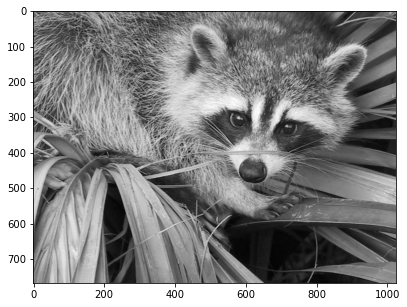

In [12]:
# Show the image using imshow function
plt.figure(figsize=(12, 5))
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

In [13]:
# Show the nr of rows and cols of array

nr_row = image.shape[0]
nr_col = image.shape[1]
image.shape

(768, 1024)

In [14]:
# We must reshape the 2D array.

image = image.reshape(nr_row*nr_col, 1)
image

array([[114],
       [130],
       [145],
       ...,
       [142],
       [141],
       [140]], dtype=uint8)

In [15]:
# We have to assign each pixel intensity to a cluster. 
kmeans = KMeans(n_clusters = 5)
kmeans.fit(image)

KMeans(n_clusters=5)

In [16]:
# Labels are 0,1,2,3,4
labels = kmeans.labels_
labels

array([4, 4, 3, ..., 3, 3, 3])

In [17]:
kmeans.cluster_centers_

array([[ 74.85967928],
       [193.5128744 ],
       [ 27.62031146],
       [152.32970716],
       [114.05158855]])

In [18]:
new_image = labels.reshape(nr_row, nr_col)
new_image

# Now we have assigned each pixel intensity to a specific cluster (0-4)

array([[4, 4, 3, ..., 4, 4, 3],
       [0, 4, 4, ..., 4, 3, 3],
       [0, 0, 4, ..., 4, 3, 3],
       ...,
       [4, 4, 4, ..., 3, 3, 3],
       [0, 4, 4, ..., 3, 3, 3],
       [0, 4, 4, ..., 3, 3, 3]])

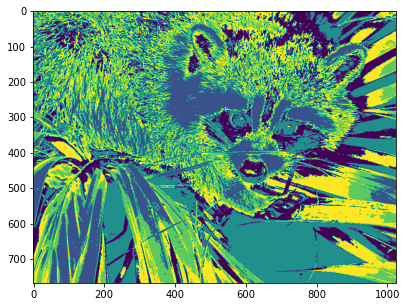

In [19]:
plt.figure(figsize=(12, 5))
plt.imshow(new_image)
plt.show()

### Exercise 3

In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets

In [21]:
# df is a dictionary
dic = datasets.load_iris()
dic

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [22]:
X = dic["data"]
y = dic["target"]
X.shape

(150, 4)

In [23]:
# We have 4 features/dimensions so we will reduce the nr of dimensions to 3
pca = PCA(n_components=3)
X = pca.fit_transform(X)
X.shape

(150, 3)

In [24]:
# 0 is setosa, 1 is versicolor, 2 is virginica
set(y)

{0, 1, 2}

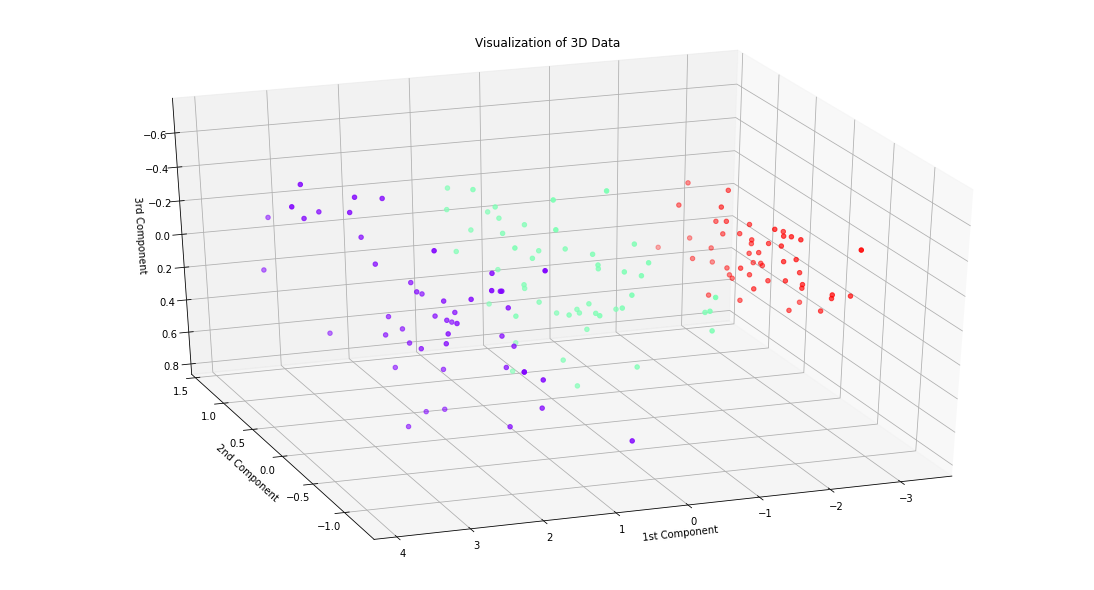

In [25]:
fig = plt.figure(figsize=(15, 8)) 
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2] , c=y, cmap=plt.cm.rainbow_r)
ax.set_title("Visualization of 3D Data") 
ax.set_xlabel("1st Component") 
ax.set_ylabel("2nd Component") 
ax.set_zlabel("3rd Component")
plt.show()

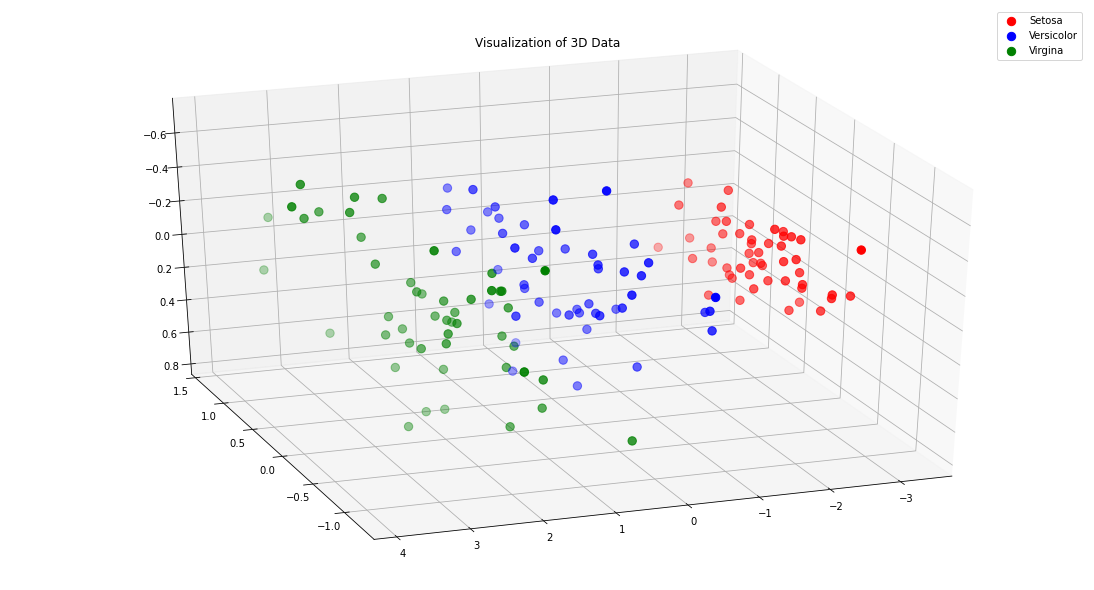

In [26]:
fig = plt.figure(figsize=(15, 8)) 
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], X[y == 0][:, 2] , s=70, c = 'red', label = 'Setosa')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], X[y == 1][:, 2] , s=70, c = 'blue', label = 'Versicolor')
ax.scatter(X[y == 2][:, 0], X[y == 2][:, 1], X[y == 2][:, 2] , s=70, c = 'green', label = 'Virgina')
plt.title('Visualization of 3D Data')
plt.legend()
plt.show()

### Exercise 4

In this assignment students have to make ARIMA model over shampoo sales
data and check the MSE between predicted and actual value.

In [27]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-27-29f22e85cc16>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [28]:
import warnings
warnings.filterwarnings("ignore")

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [29]:
df = pd.read_csv('shampoo_sales.txt', sep=";", header=0, index_col="Month", parse_dates=True)
df

,Sales
Month,
01-01,266.0
01-02,145.9
01-03,183.1
01-04,119.3
01-05,180.3
01-06,168.5
01-07,231.8
01-08,224.5
01-09,192.8


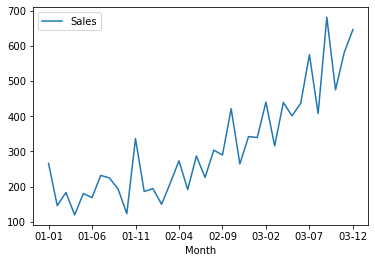

In [30]:
df.plot()
pyplot.show()

In [31]:
X = df.values
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [32]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [33]:
train, test = X[0:size], X[size:len(X)]
print(train.shape)
print(test.shape)

(21, 1)
(15, 1)


In [34]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=272.964526, expected=421.600000
predicted=290.313946, expected=264.500000
predicted=349.117703, expected=342.300000
predicted=306.513013, expected=339.700000
predicted=387.376470, expected=440.400000
predicted=348.154215, expected=315.900000
predicted=386.308852, expected=439.300000
predicted=356.082094, expected=401.300000
predicted=446.379448, expected=437.400000
predicted=394.737254, expected=575.500000
predicted=434.915429, expected=407.600000
predicted=507.923446, expected=682.000000
predicted=435.482928, expected=475.300000
predicted=652.743783, expected=581.300000
predicted=546.343427, expected=646.900000
Test MSE: 7547.806


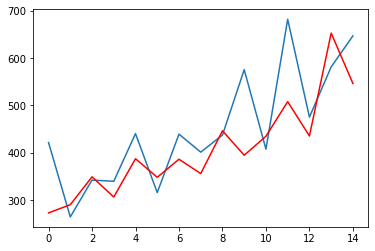

In [35]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.


In [3]:
df = pd.read_csv("nba_2013.csv")
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
df.shape

(481, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [6]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0



These columns do not include any useful information for our prediction so we are going to drop them

In [7]:
df.drop(["player"], axis=1, inplace=True)
df.columns

Index(['pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.',
       'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta',
       'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts',
       'season', 'season_end'],
      dtype='object')

In [8]:
for col in df.columns:
    print(col + " : " + str(df[col].unique()))

pos : ['SF' 'C' 'PF' 'SG' 'PG' 'G' 'F']
age : [23 20 27 28 25 24 38 32 31 35 19 29 26 21 33 37 34 22 30 39 36]
bref_team_id : ['TOT' 'OKC' 'ORL' 'NOP' 'NYK' 'POR' 'MIA' 'MEM' 'BRK' 'PHI' 'MIL' 'ATL'
 'WAS' 'GSW' 'DEN' 'HOU' 'SAS' 'BOS' 'PHO' 'MIN' 'LAC' 'CLE' 'UTA' 'DET'
 'CHA' 'DAL' 'CHI' 'LAL' 'IND' 'TOR' 'SAC']
g : [63 81 53 73 56 46 69 65 55 80 19 72 78 22 77 33 50 15 68 48 71 26 14 27
 20 79 42 41 82 67 52  6 43  3 61 76 60 24 35 29 70 62  4 31 54 23 21  7
 13  2  5 34 51 47 49 74 45 66 37 30 59 64  8 32 40  9 28 11 39 18  1 17
 25 38 58 12 44 75 10 83 57 36]
gs : [ 0 20 12 73 30  2 69  9 28 65 26 62 14 23 77  1 19 10 39 24 40 56 82  4
 15 25 55  7 13 67 45 76 79 58 81  3  6  8 68 41 70 17 35 71 78 66 44 63
 75 43 74 61 22  5 54 59 60 80 64 48 36 18 52 37 32 34 29 47 31 72 33 11
 16 27 42 50 21 57 53 46]
mp : [ 847 1197  961 2552  951  330 2498 1072 1936 1278 2045  185 1396 1773
 2309  795 1897 2982  186  925 2723   97 1161  968 1939  429  952  132
  473  368 1471 1257 2204 1735  

In [9]:
# Columns season and season_end take only 1 value so it would reasonable to drop these columns.
df.drop(["season", "season_end"], axis=1, inplace=True)
df.columns

Index(['pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.',
       'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta',
       'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [10]:
# We have 2 categorical features
df.dtypes

pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
dtype: object

In [11]:
# Object datatypes must have only categorical/string values
for i in range(len(df.dtypes)):
    if df.dtypes[i] == "object":
        print(df.dtypes.index[i])

pos
bref_team_id


In [12]:
for i in range(len(df.dtypes)):
    if df.dtypes[i] == "object":
        print(df.dtypes.index[i] + " : ")
        print(df[df.dtypes.index[i]].value_counts())
        print()

pos : 
SG    109
SF     99
PF     96
C      90
PG     85
G       1
F       1
Name: pos, dtype: int64

bref_team_id : 
TOT    63
NOP    18
OKC    17
LAL    16
UTA    16
LAC    16
HOU    15
POR    15
DET    15
NYK    15
PHO    15
ATL    15
BRK    15
DAL    15
MIA    15
BOS    14
SAS    14
WAS    14
CLE    14
MIN    14
CHA    13
ORL    13
MIL    13
MEM    13
DEN    12
GSW    12
PHI    12
IND    12
CHI    11
TOR    10
SAC     9
Name: bref_team_id, dtype: int64



In [13]:
df["pos"].unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [14]:
df["bref_team_id"].unique()

array(['TOT', 'OKC', 'ORL', 'NOP', 'NYK', 'POR', 'MIA', 'MEM', 'BRK',
       'PHI', 'MIL', 'ATL', 'WAS', 'GSW', 'DEN', 'HOU', 'SAS', 'BOS',
       'PHO', 'MIN', 'LAC', 'CLE', 'UTA', 'DET', 'CHA', 'DAL', 'CHI',
       'LAL', 'IND', 'TOR', 'SAC'], dtype=object)

In [15]:
df.isna().sum().values.any()

True

In [16]:
df.isna().sum()

pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
dtype: int64

In [17]:
for i in range(len(df.dtypes)):
    col = df.dtypes.index[i]
    if df.dtypes[i] == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

In [18]:
df.isna().sum()

pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
dtype: int64

In [19]:
X = df.drop(["pts"], axis=1).copy()
y = df["pts"].copy()

In [20]:
X = pd.get_dummies(X, columns=["pos", "bref_team_id"])
X.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,bref_team_id_ORL,bref_team_id_PHI,bref_team_id_PHO,bref_team_id_POR,bref_team_id_SAC,bref_team_id_SAS,bref_team_id_TOR,bref_team_id_TOT,bref_team_id_UTA,bref_team_id_WAS
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0,0,0,0,0,0,0,1,0,0
1,20,81,20,1197,93,185,0.503,0,0,0.285111,...,0,0,0,0,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.285111,...,0,0,0,0,0,0,0,1,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,1,0,0,0,0,0,0,0,0,0
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# We have a regression problem
y.unique()

array([ 171,  265,  362, 1330,  328,   92, 1603,  303,  701,  495,  572,
         38,  477,  564,  810,  436,  525, 2112,   28,  352, 1107,   25,
        401,  280,  930,  112,  240,   22,  170,  150,  660,  558,  738,
        625,  166,  911,  298, 1070,  666,  161,  403, 1249,  217,  573,
          3,   72,  222,  497,  378,  821,  763,    5,   12,  492,  197,
        491, 1042, 1281,  891,  419,  998,    7,  645,  159,   64,   63,
         83,  274,  115,  895, 1089,  587,  878,  136,   43,  225,  485,
        347,  925,  470,  101,  967, 1167,  490,  716,  480,  846,    0,
         71,  257,   68,   47,  527,  338, 1256,  153, 1614,   16,   33,
       1282,  890,  356,  510,   26, 1873,  529,   42,  144, 1394,  357,
        641,   66,  177,   97,  339, 1011, 1791,  717,  286,  202, 1542,
       1095,  511, 1119,  929, 2593,    2,  145, 1560,    6,  214, 1096,
        416,  164,  970,   19,  630,  425,  638, 1068,   39,  273,  174,
        910,  315,  248,  859, 1041, 1457,  258, 17

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [23]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

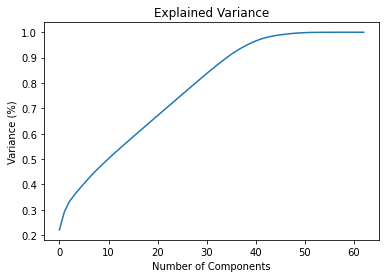

In [24]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
X_new = pca.fit_transform(x_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [25]:
pca = PCA(n_components=40)
x_train = pca.fit_transform(x_train)
x_train.shape

(360, 40)

In [26]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [27]:
from sklearn.metrics import r2_score

# Model Performance on TRAINING SET

print("R Squared : ", knn.score(x_train, y_train))

pred_train = knn.predict(x_train)
print("Adjusted r2_score : ", r2_score(y_train, pred_train))

R Squared :  0.8523925312597214
Adjusted r2_score :  0.8523925312597214


In [28]:
x_test = scaler.transform(x_test)
x_test = pca.transform(x_test)

In [29]:
# Model Performance on TEST SET

print("R Squared : ", knn.score(x_test, y_test))

pred_test = knn.predict(x_test)
print("Adjusted R Squared : ", r2_score(y_test, pred_test))


R Squared :  0.7752114756092384
Adjusted R Squared :  0.7752114756092384


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [31]:
# Choosing the value of K
test_error = []
for k in range(1, 40):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    test_error.append(np.mean(y_pred != y_test))

Text(0.5, 1.0, 'How to select value of K')

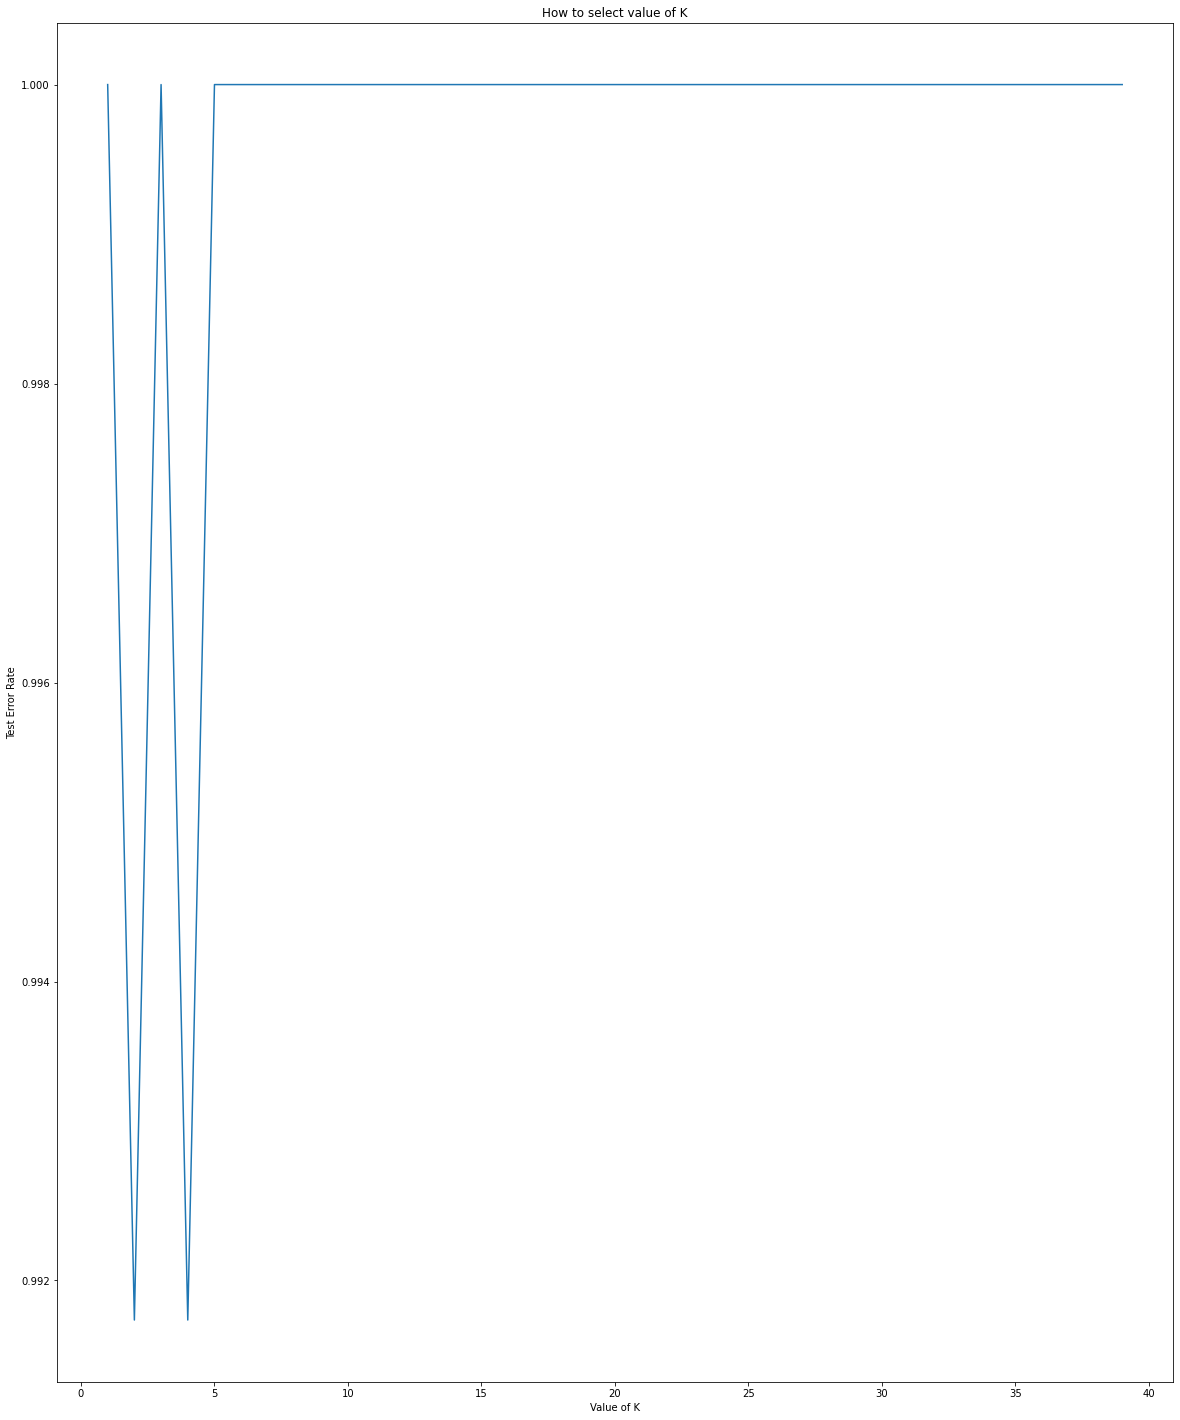

In [32]:
plt.figure(figsize=(20,25))
plt.plot(range(1,40), test_error)
plt.xlabel("Value of K")
plt.ylabel("Test Error Rate")
plt.title("How to select value of K")

In [33]:
# Choosing the value of K
test_error = []
for k in range(1, 40):
    kfold = KFold(n_splits=6)
    cv_results = cross_val_score(KNeighborsRegressor(n_neighbors=k), x_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
    test_error.append(np.mean(cv_results))

In [34]:
# Choosing the value of K
test_error = []
for k in range(1, 40):
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(KNeighborsRegressor(n_neighbors=k), x_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
    test_error.append(np.mean(cv_results))

Text(0.5, 1.0, 'How to select value of K')

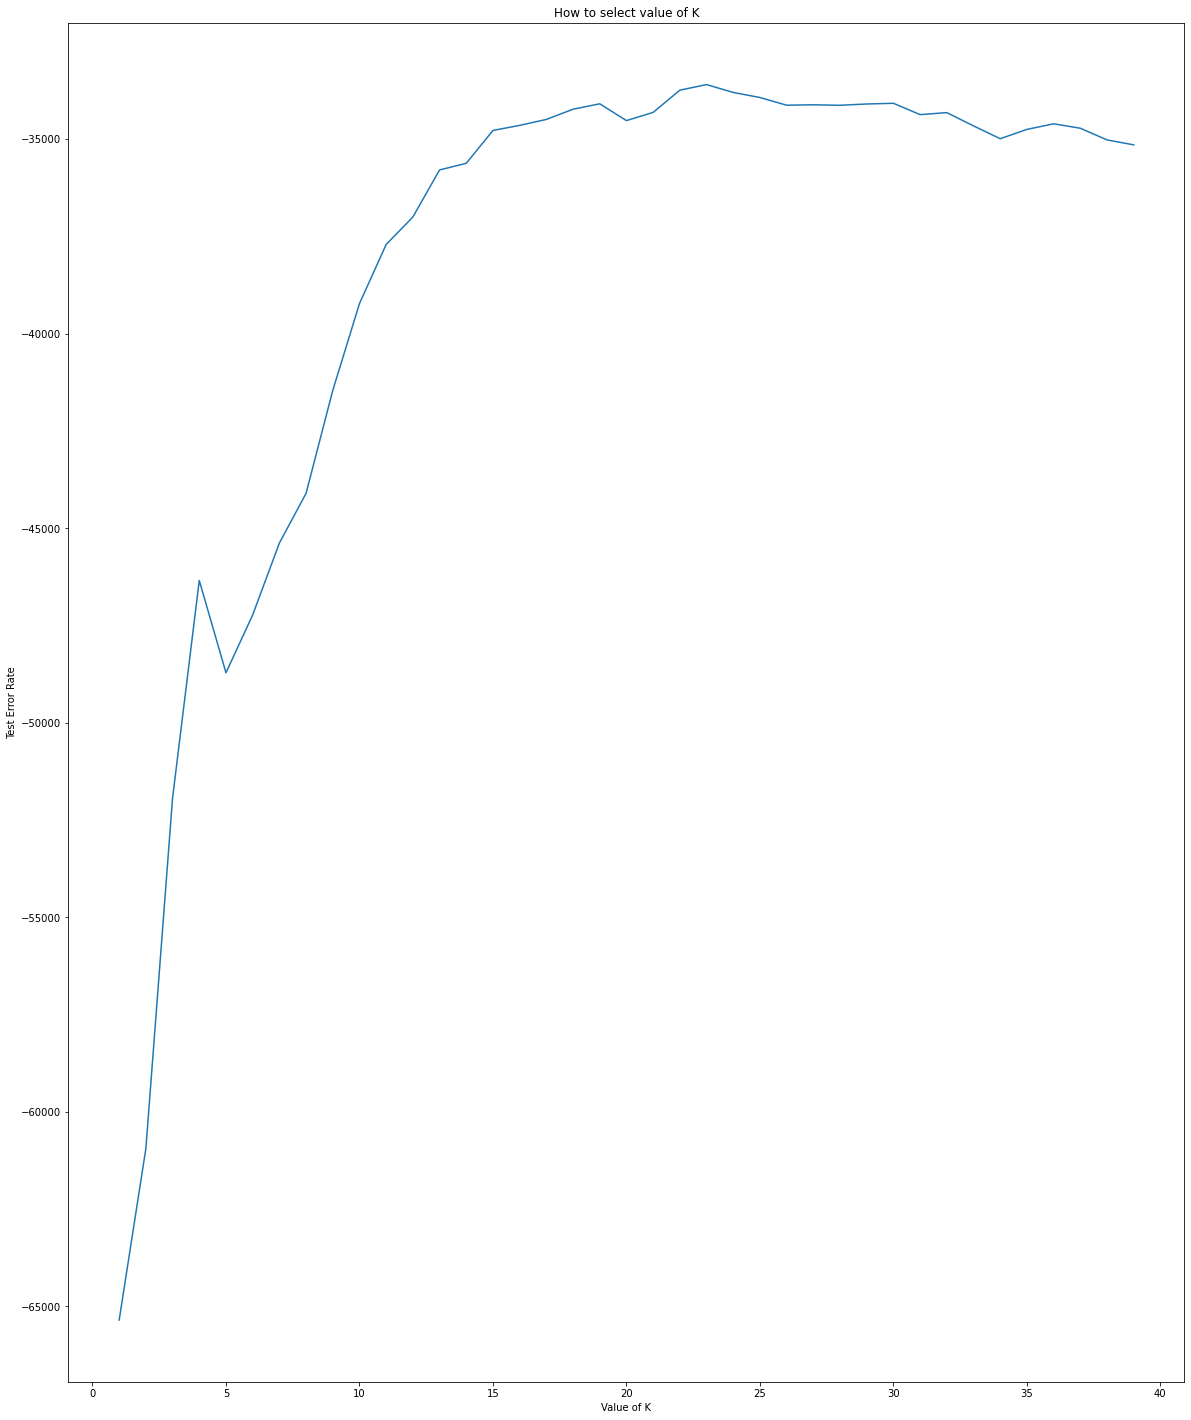

In [35]:
plt.figure(figsize=(20,25))
plt.plot(range(1,40), test_error)
plt.xlabel("Value of K")
plt.ylabel("Test Error Rate")
plt.title("How to select value of K")

In [36]:
knn = KNeighborsRegressor(n_neighbors=30)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=30)

In [37]:
# Model Performance on TRAINING SET

print("R Squared : ", knn.score(x_train, y_train))

pred_train = knn.predict(x_train)
print("Adjusted r2_score : ", r2_score(y_train, pred_train))

R Squared :  0.8444650719080619
Adjusted r2_score :  0.8444650719080619


In [38]:
print("R Squared : ", knn.score(x_test, y_test))

pred_test = knn.predict(x_test)
print("Adjusted R Squared : ", r2_score(y_test, pred_test))

R Squared :  0.8321744203165404
Adjusted R Squared :  0.8321744203165404


In [51]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [5,10,15,20,25,30]
              }

In [52]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3, n_jobs=-1)
gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:    0.8s finished


GridSearchCV(estimator=KNeighborsRegressor(algorithm='ball_tree', leaf_size=18,
                                           n_neighbors=20),
             n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [5, 10, 15, 20, 25, 30]},
             verbose=3)

In [53]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 20}

In [54]:
knn = KNeighborsRegressor(n_neighbors=20, algorithm="ball_tree", leaf_size=18)
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=18, n_neighbors=20)

In [55]:
# Model Performance on TRAINING SET

print("R Squared : ", knn.score(x_train, y_train))

pred_train = knn.predict(x_train)
print("Adjusted r2_score : ", r2_score(y_train, pred_train))

R Squared :  0.8480049056978416
Adjusted r2_score :  0.8480049056978416


In [56]:
print("R Squared : ", knn.score(x_test, y_test))

pred_test = knn.predict(x_test)
print("Adjusted R Squared : ", r2_score(y_test, pred_test))

R Squared :  0.8418274318278877
Adjusted R Squared :  0.8418274318278877
